In [106]:
pip install pandas 


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [107]:
pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [108]:
pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [109]:
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt


In [110]:
vehicles_us = pd.read_csv('/Users/sebastiangarcia/GitHub/project-/vehicles_us.csv')

In [111]:
vehicles_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [112]:
print(vehicles_us)

       price  model_year           model  condition  cylinders fuel  odometer  \
0       9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1      25500         NaN      ford f-150       good        6.0  gas   88705.0   
2       5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3       1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4      14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
...      ...         ...             ...        ...        ...  ...       ...   
51520   9249      2013.0   nissan maxima   like new        6.0  gas   88136.0   
51521   2700      2002.0     honda civic    salvage        4.0  gas  181500.0   
51522   3950      2009.0  hyundai sonata  excellent        4.0  gas  128000.0   
51523   7455      2013.0  toyota corolla       good        4.0  gas  139573.0   
51524   6300      2014.0   nissan altima       good        4.0  gas       NaN   

      transmission    type 

In [113]:
vehicles_us.duplicated().sum()

np.int64(0)

In [114]:
vehicles_us['model_year'].fillna(vehicles_us['model_year'].median(), inplace=True)
vehicles_us['model_year'] = vehicles_us['model_year'].infer_objects(copy=False)

/var/folders/ns/g6565d0115jg6_g6_5z2hlvw0000gn/T/ipykernel_95776/106401171.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vehicles_us['model_year'].fillna(vehicles_us['model_year'].median(), inplace=True)


In [115]:
vehicles_us['cylinders'] = vehicles_us.groupby('model')['cylinders'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 4))

In [116]:
vehicles_us["odometer"] = pd.to_numeric(vehicles_us["odometer"], errors="coerce")
vehicles_us["odometer"].fillna(vehicles_us["odometer"].mean(), inplace=True)
vehicles_us["odometer"] = vehicles_us["odometer"].round(0)  # Round to the nearest whole number

/var/folders/ns/g6565d0115jg6_g6_5z2hlvw0000gn/T/ipykernel_95776/3958136712.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vehicles_us["odometer"].fillna(vehicles_us["odometer"].mean(), inplace=True)


In [117]:
vehicles_us['paint_color'] = vehicles_us['paint_color'].fillna('No info')

In [118]:
vehicles_us['is_4wd'] = vehicles_us.groupby('model')['is_4wd'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 0))

In [119]:
vehicles_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [120]:
print(vehicles_us)

       price  model_year           model  condition  cylinders fuel  odometer  \
0       9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1      25500      2011.0      ford f-150       good        6.0  gas   88705.0   
2       5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3       1500      2003.0      ford f-150       fair        8.0  gas  115553.0   
4      14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
...      ...         ...             ...        ...        ...  ...       ...   
51520   9249      2013.0   nissan maxima   like new        6.0  gas   88136.0   
51521   2700      2002.0     honda civic    salvage        4.0  gas  181500.0   
51522   3950      2009.0  hyundai sonata  excellent        4.0  gas  128000.0   
51523   7455      2013.0  toyota corolla       good        4.0  gas  139573.0   
51524   6300      2014.0   nissan altima       good        4.0  gas  115553.0   

      transmission    type 

In [121]:
max_price = vehicles_us['price'].max()
print("Highest price in the dataset:", max_price)

Highest price in the dataset: 375000


In [122]:
car_models = vehicles_us['model'].unique()
num_car_models = len(car_models)
print(car_models)
print(num_car_models)

['bmw x5' 'ford f-150' 'hyundai sonata' 'chrysler 200' 'chrysler 300'
 'toyota camry' 'honda pilot' 'kia sorento' 'chevrolet silverado 1500'
 'honda accord' 'ram 1500' 'gmc yukon' 'jeep cherokee'
 'chevrolet traverse' 'hyundai elantra' 'chevrolet tahoe' 'toyota rav4'
 'chevrolet silverado' 'jeep wrangler' 'chevrolet malibu' 'ford fusion se'
 'chevrolet impala' 'chevrolet corvette' 'jeep liberty' 'toyota camry le'
 'nissan altima' 'subaru outback' 'toyota highlander' 'dodge charger'
 'toyota tacoma' 'chevrolet equinox' 'nissan rogue'
 'mercedes-benz benze sprinter 2500' 'honda cr-v' 'jeep grand cherokee'
 'toyota 4runner' 'ford focus' 'honda civic' 'kia soul'
 'chevrolet colorado' 'ford f150 supercrew cab xlt'
 'chevrolet camaro lt coupe 2d' 'chevrolet cruze' 'ford mustang'
 'chevrolet silverado 3500hd' 'nissan frontier crew cab sv'
 'subaru impreza' 'jeep grand cherokee laredo' 'nissan versa'
 'ford f-250 sd' 'chevrolet silverado 1500 crew' 'ford f250 super duty'
 'chevrolet camaro' 'f

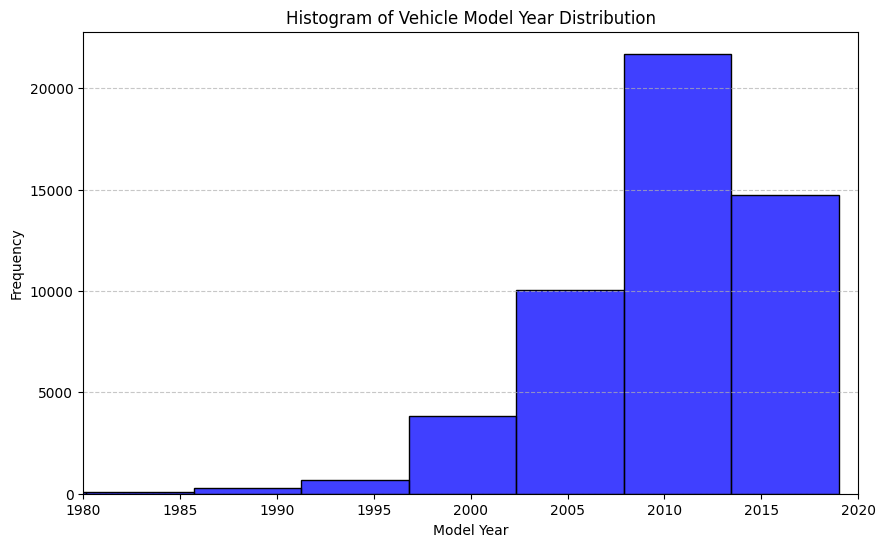

In [123]:

plt.figure(figsize=(10, 6))
sns.histplot(vehicles_us['model_year'], bins=20, color="blue")
plt.xlabel("Model Year")
plt.ylabel("Frequency")
plt.title("Histogram of Vehicle Model Year Distribution")
plt.xlim(1980, 2020) 
plt.xticks(range(1980, 2021, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

/var/folders/ns/g6565d0115jg6_g6_5z2hlvw0000gn/T/ipykernel_95776/539748518.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Condition")


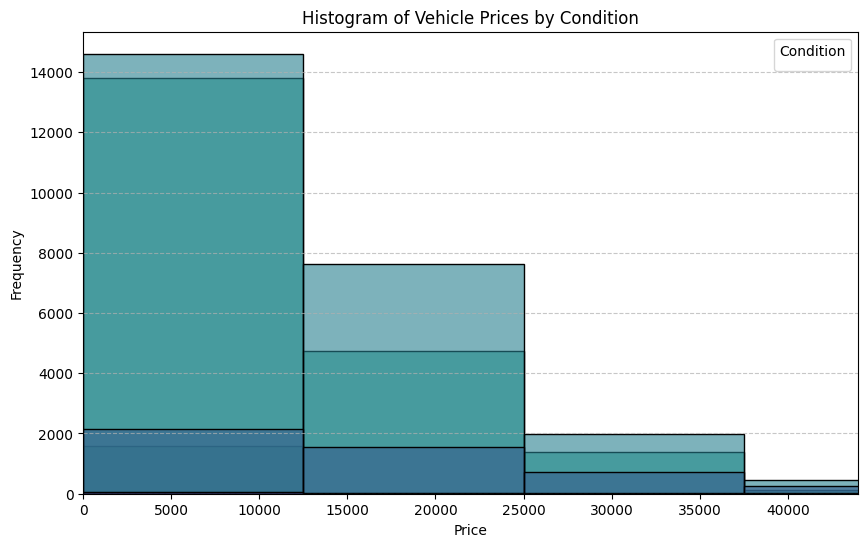

In [124]:
vehicles_us['condition'] = pd.Categorical(vehicles_us['condition'], categories=['new', 'like new', 'excellent', 'good', 'fair', 'salvage'], ordered=True)
plt.figure(figsize=(10, 6))
sns.histplot(data=vehicles_us, x='price', hue='condition', bins=30, palette="viridis", alpha=0.6)

plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of Vehicle Prices by Condition")
plt.xlim(0, vehicles_us['price'].quantile(0.99)) 
plt.legend(title="Condition")  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

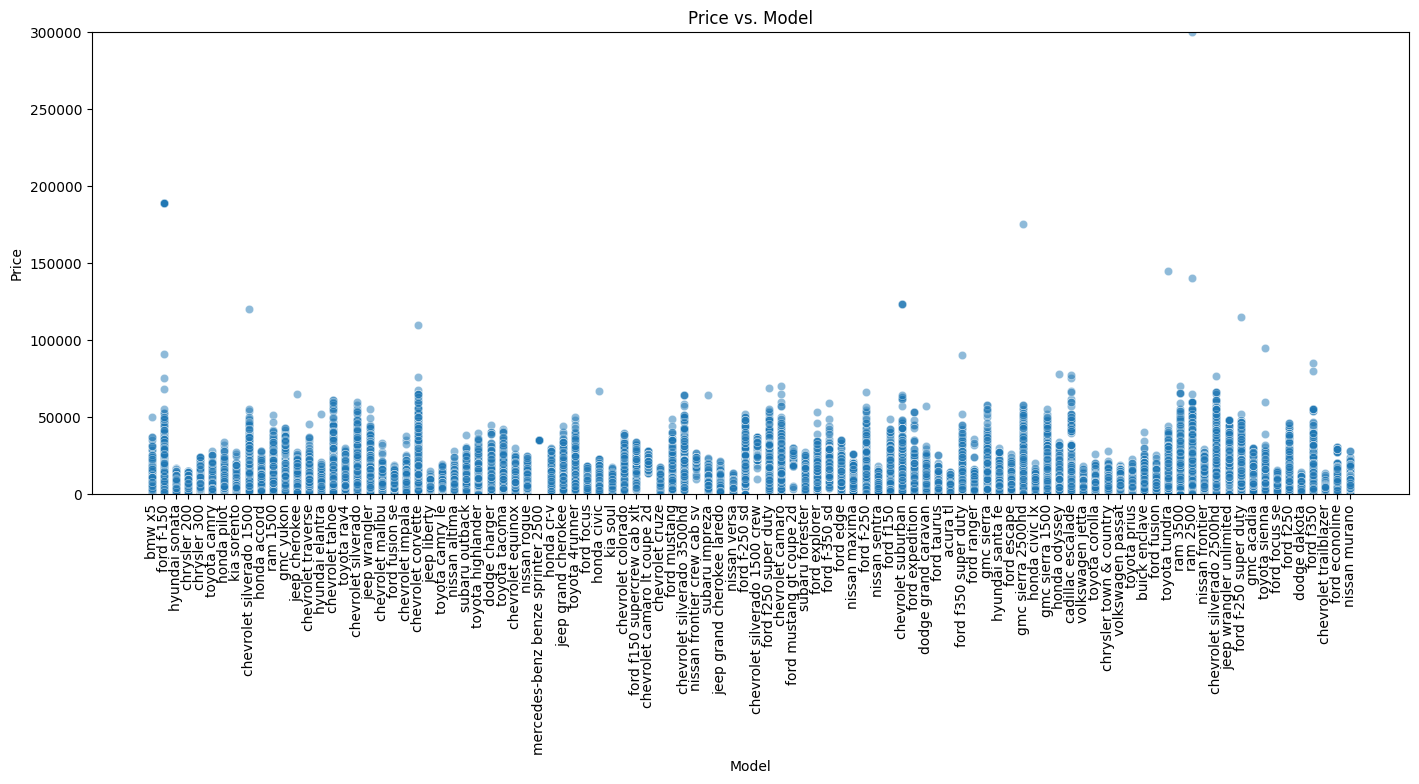

In [125]:
plt.figure(figsize=(17, 6))
sns.scatterplot(x=vehicles_us['model'], y=vehicles_us['price'], alpha=0.5)

plt.xticks(rotation=90)  
plt.xlabel("Model")
plt.ylabel("Price")
plt.title("Price vs. Model")
plt.ylim(0,300000)
plt.show()

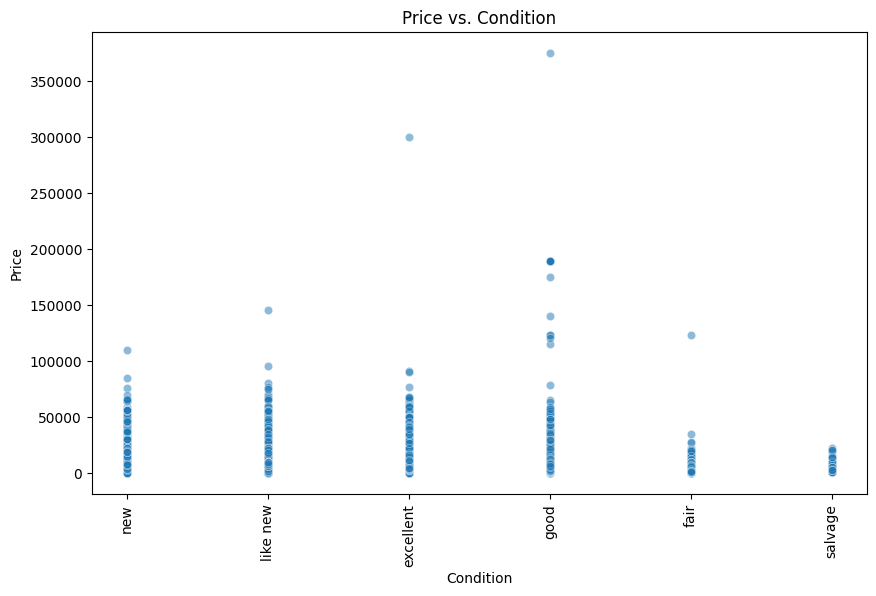

In [126]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=vehicles_us['condition'], y=vehicles_us['price'], alpha=0.5)

plt.xticks(rotation=90) 
plt.xlabel("Condition")
plt.ylabel("Price")
plt.title("Price vs. Condition")

plt.show()

/var/folders/ns/g6565d0115jg6_g6_5z2hlvw0000gn/T/ipykernel_95776/3763827214.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=vehicles_us, x='model', y='condition', jitter=True, alpha=0.5, size=5, palette="viridis", order=vehicles_us['model'].value_counts().index)


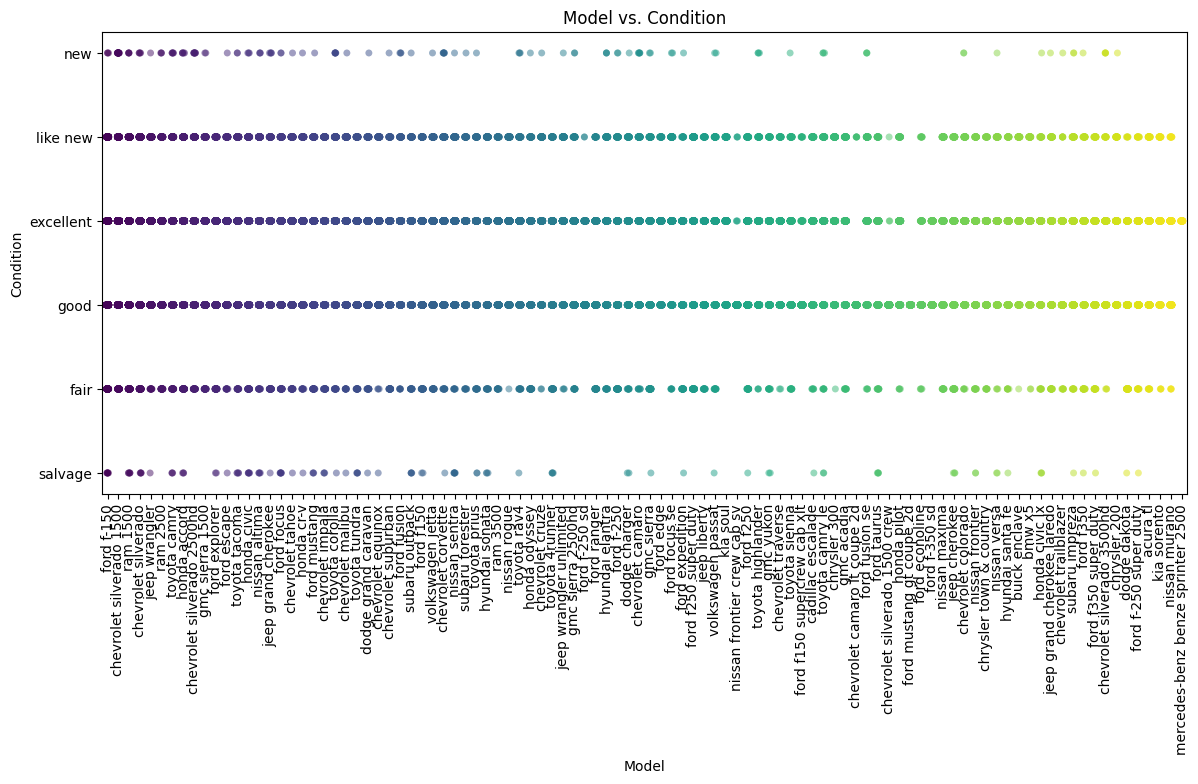

In [127]:

plt.figure(figsize=(14, 6))

sns.stripplot(data=vehicles_us, x='model', y='condition', jitter=True, alpha=0.5, size=5, palette="viridis", order=vehicles_us['model'].value_counts().index)

plt.xticks(rotation=90)  
plt.xlabel("Model")
plt.ylabel("Condition")
plt.title("Model vs. Condition")

plt.show()